In [242]:
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
# import netflix data csv.
df = pd.read_csv('viewing-activity-data.csv')

In [244]:
# remove coulumns you do not want to analyze by adding them to df.drop
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

,Profile Name,Start Time,Duration,Title
0,Brother Two,2/18/2022 8:36,0:19:03,Komi Can't Communicate: Season 1: It's just th...
1,Brother Two,2/18/2022 7:10,0:03:43,Komi Can't Communicate: Season 1: It's just th...


In [245]:
# convert Start Time from object to datetime
# attach UTC to datetime format 
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

,Profile Name,Start Time,Duration,Title
0,Brother Two,2022-02-18 08:36:00+00:00,0:19:03,Komi Can't Communicate: Season 1: It's just th...
1,Brother Two,2022-02-18 07:10:00+00:00,0:03:43,Komi Can't Communicate: Season 1: It's just th...


In [246]:
# change Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

In [247]:
# convert Duration from object to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])

Start Time      datetime64[ns, US/Eastern]
Profile Name                        object
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [248]:
# group and sum profile watch time
df_groupby_profile = df.groupby(['Profile Name'], as_index=False)['Duration'].sum()

In [251]:
df_groupby_profile

,Profile Name,Duration
0,Brother One,51 days 07:42:09
1,Brother Two,115 days 04:32:20
2,Me,83 days 07:23:10
3,Mother,55 days 02:56:30
4,Sister,338 days 11:05:33


In [255]:
# rounds to days
df_groupby_profile['Duration'] = df_groupby_profile['Duration'].dt.days

In [256]:
df_groupby_profile

,Profile Name,Duration
0,Brother One,51
1,Brother Two,115
2,Me,83
3,Mother,55
4,Sister,338


In [257]:

df_groupby_profile['Duration'] = pd.to_numeric(df_groupby_profile['Duration'])

In [260]:
df_groupby_profile

,Profile Name,Duration
0,Brother One,51
1,Brother Two,115
2,Me,83
3,Mother,55
4,Sister,338


<AxesSubplot:xlabel='Profile Name'>

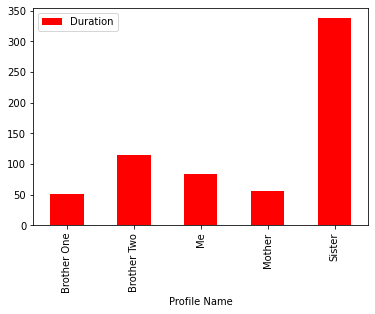

In [261]:
# trying to create a bar graph, but it wont graph timedeltas.
df_groupby_profile.plot.bar(x = 'Profile Name', y = 'Duration', color = 'red')

In [ ]:
# creates a csv of each profiles watch time
df_groupby_profile.to_csv('profile_watch_time.csv', index=False)

In [ ]:
#df_groupby_profile['Duration'] = pd.to_numeric(df_groupby_profile['Duration'])